# Modeling
In this notebook, we are going to use the K-Means algorithm to segment the customers into different clusters. 

We will:
- Prepare the dataset for analysis by one hot encoding or label encoding the categorical data
- Choose the number of clusters by looking at the inertia and silhouette score
- Visualize the data from each cluster

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_pickle('./saved-items/df.pkl')

df.head()

,Age,Education,Relationship_Status,Income,Seniority,Num_children,Has_child,Wines,Fruits,Meat,Fish,Sweets,Gold,Total
0,64,Postgraduate,Alone,58138,9.30,0,False,635,88,546,172,88,88,1617
1,67,Postgraduate,Alone,46344,7.80,2,True,11,1,6,2,1,6,27
2,56,Postgraduate,Relationship,71613,8.34,0,False,426,49,127,111,21,42,776
3,37,Postgraduate,Relationship,26646,7.87,1,True,11,4,20,10,3,5,53
4,40,Postgraduate,Relationship,58293,7.93,1,True,173,43,118,46,27,15,422


In [3]:
df.dtypes

Age                      int64
Education               object
Relationship_Status     object
Income                   int32
Seniority              float64
Num_children             int64
Has_child                 bool
Wines                    int64
Fruits                   int64
Meat                     int64
Fish                     int64
Sweets                   int64
Gold                     int64
Total                    int64
dtype: object

## Convert Categorical Data to Numerical

In [4]:
# One Hot Encode Education column
df['Edu'] = df['Education'].apply(lambda x: 1 if x == "Postgraduate" else 0)
df['Child'] = df['Has_child'].apply(lambda x: 0 if x == False else 1)

# Label Encode the Relationship Status column
df['Single'] = df['Relationship_Status'].apply(lambda x: 1 if x == 'Alone' else 0)
df['Relationship'] = df['Relationship_Status'].apply(lambda x: 1 if x == 'Relationship' else 0)

In [5]:
df.head()

,Age,Education,Relationship_Status,Income,Seniority,Num_children,Has_child,Wines,Fruits,Meat,Fish,Sweets,Gold,Total,Edu,Child,Single,Relationship
0,64,Postgraduate,Alone,58138,9.30,0,False,635,88,546,172,88,88,1617,1,0,1,0
1,67,Postgraduate,Alone,46344,7.80,2,True,11,1,6,2,1,6,27,1,1,1,0
2,56,Postgraduate,Relationship,71613,8.34,0,False,426,49,127,111,21,42,776,1,0,0,1
3,37,Postgraduate,Relationship,26646,7.87,1,True,11,4,20,10,3,5,53,1,1,0,1
4,40,Postgraduate,Relationship,58293,7.93,1,True,173,43,118,46,27,15,422,1,1,0,1


Save new DataFrame with numerical columns

In [6]:
num_df = df[['Age', 'Edu', 'Single', 'Relationship', 'Income', 
             'Seniority', 'Num_children', 'Child', 'Wines', 
             'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Total']]

In [7]:
num_df.head()

,Age,Edu,Single,Relationship,Income,Seniority,Num_children,Child,Wines,Fruits,Meat,Fish,Sweets,Gold,Total
0,64,1,1,0,58138,9.30,0,0,635,88,546,172,88,88,1617
1,67,1,1,0,46344,7.80,2,1,11,1,6,2,1,6,27
2,56,1,0,1,71613,8.34,0,0,426,49,127,111,21,42,776
3,37,1,0,1,26646,7.87,1,1,11,4,20,10,3,5,53
4,40,1,0,1,58293,7.93,1,1,173,43,118,46,27,15,422


In [8]:
# Reset index
num_df.reset_index(drop=True, inplace=True)

In [9]:
num_df.dtypes

Age               int64
Edu               int64
Single            int64
Relationship      int64
Income            int32
Seniority       float64
Num_children      int64
Child             int64
Wines             int64
Fruits            int64
Meat              int64
Fish              int64
Sweets            int64
Gold              int64
Total             int64
dtype: object

In [10]:
correlation_df = num_df.corr()

correlation_df

,Age,Edu,Single,Relationship,Income,Seniority,Num_children,Child,Wines,Fruits,Meat,Fish,Sweets,Gold,Total
Age,1.000000,0.150562,-0.002742,0.002742,0.213892,-0.011716,0.092613,-0.012594,0.165217,0.014301,0.040568,0.042514,0.021999,0.062217,0.119028
Edu,0.150562,1.000000,0.021456,-0.021456,0.170706,-0.039177,0.048169,0.026338,0.154653,0.006447,0.091924,-0.026936,-0.026147,0.013409,0.117393
Single,-0.002742,0.021456,1.000000,-1.000000,0.011392,0.011301,-0.041488,-0.057790,0.007194,0.025961,0.031876,0.015231,0.016612,0.022591,0.021740
Relationship,0.002742,-0.021456,-1.000000,1.000000,-0.011392,-0.011301,0.041488,0.057790,-0.007194,-0.025961,-0.031876,-0.015231,-0.016612,-0.022591,-0.021740
Income,0.213892,0.170706,0.011392,-0.011392,1.000000,-0.025011,-0.349588,-0.409769,0.730689,0.537307,0.702905,0.551586,0.555735,0.416743,0.823645
Seniority,-0.011716,-0.039177,0.011301,-0.011301,-0.025011,1.000000,-0.025831,0.001345,0.168007,0.068329,0.090654,0.082570,0.080921,0.161501,0.158455
Num_children,0.092613,0.048169,-0.041488,0.041488,-0.349588,-0.025831,1.000000,0.799059,-0.356040,-0.396008,-0.513539,-0.428121,-0.391436,-0.267747,-0.500347
Child,-0.012594,0.026338,-0.057790,0.057790,-0.409769,0.001345,0.799059,1.000000,-0.345349,-0.411579,-0.586141,-0.449993,-0.404827,-0.244919,-0.522597
Wines,0.165217,0.154653,0.007194,-0.007194,0.730689,0.168007,-0.356040,-0.345349,1.000000,0.385133,0.593755,0.397339,0.388580,0.391378,0.897616
Fruits,0.014301,0.006447,0.025961,-0.025961,0.537307,0.068329,-0.396008,-0.411579,0.385133,1.000000,0.568336,0.591464,0.571195,0.390442,0.614031


We want to group customers by how much they spend, so we will choose columns with high correlation values with `Total` column

In [11]:
# Strong positive correlation with 'Total'
pos_corr = correlation_df['Total'][(correlation_df['Total'] >= 0.5)]
pos_corr

Income    0.823645
Wines     0.897616
Fruits    0.614031
Meat      0.857106
Fish      0.644740
Sweets    0.609521
Gold      0.529779
Total     1.000000
Name: Total, dtype: float64

In [12]:
# Strong negative correlation with 'Total'
neg_corr = correlation_df['Total'][(correlation_df['Total'] <= -0.5)]
neg_corr

Num_children   -0.500347
Child          -0.522597
Name: Total, dtype: float64

All items

In [13]:
X = num_df[neg_corr.index.tolist() + pos_corr.index.tolist()].copy()

X.head()

,Num_children,Child,Income,Wines,Fruits,Meat,Fish,Sweets,Gold,Total
0,0,0,58138,635,88,546,172,88,88,1617
1,2,1,46344,11,1,6,2,1,6,27
2,0,0,71613,426,49,127,111,21,42,776
3,1,1,26646,11,4,20,10,3,5,53
4,1,1,58293,173,43,118,46,27,15,422


Remove the singular items

In [14]:
# X = num_df[['Num_children', 'Child', 'Income', 'Total']]

# X.head()

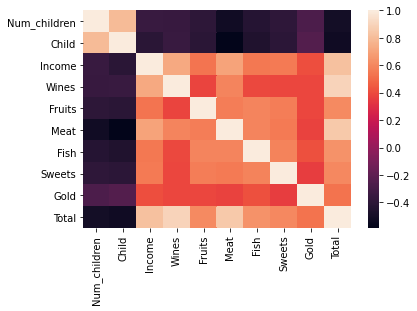

In [15]:
sns.heatmap(X.corr())
plt.show()

## Scale the data between 0 and 1

In [16]:
scaler = MinMaxScaler()

In [17]:
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_scaled.head()

,Num_children,Child,Income,Wines,Fruits,Meat,Fish,Sweets,Gold,Total
0,0.000000,0.0,0.503625,0.425318,0.442211,0.316522,0.664093,0.335878,0.274143,0.639683
1,0.666667,1.0,0.398325,0.007368,0.005025,0.003478,0.007722,0.003817,0.018692,0.008730
2,0.000000,0.0,0.623933,0.285332,0.246231,0.073623,0.428571,0.080153,0.130841,0.305952
3,0.333333,1.0,0.222456,0.007368,0.020101,0.011594,0.038610,0.011450,0.015576,0.019048
4,0.333333,1.0,0.505009,0.115874,0.216080,0.068406,0.177606,0.103053,0.046729,0.165476


# K Means Clustering

We will use inertia and silhouette scores to determine what the best number of clusters is

In [18]:
clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
scores   = {}
inertias = {}

for i in clusters:
    kmeans = KMeans(n_clusters=i, n_init=50, algorithm='full')
    kmeans.fit(X_scaled)
    scores[i] = silhouette_score(X_scaled, kmeans.labels_)
    inertias[i] = kmeans.inertia_

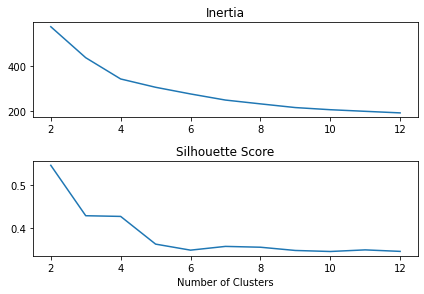

In [19]:
# Two subplots
fig, (ax1, ax2) = plt.subplots(nrows=2)

# Inertia
ax1.plot(list(inertias.keys()), list(inertias.values()))
ax1.set_title('Inertia')

# Silhouette Score
ax2.plot(list(scores.keys()), list(scores.values()))
ax2.set_title('Silhouette Score')

# Spacing
fig.tight_layout()

# X-Axis Label
plt.xlabel('Number of Clusters')

plt.show()

4 clusters seems to be the best, according to the inertia and silhouette score

In [20]:
kmeans = KMeans(n_clusters=4, n_init=100, algorithm='full', random_state=42)
kmeans.fit(X_scaled)

KMeans(algorithm='full', n_clusters=4, n_init=100, random_state=42)

Add the labels to the datasets

In [21]:
X_scaled['labels'] = kmeans.labels_
X['labels'] = kmeans.labels_

In [22]:
X.head()

,Num_children,Child,Income,Wines,Fruits,Meat,Fish,Sweets,Gold,Total,labels
0,0,0,58138,635,88,546,172,88,88,1617,1
1,2,1,46344,11,1,6,2,1,6,27,0
2,0,0,71613,426,49,127,111,21,42,776,1
3,1,1,26646,11,4,20,10,3,5,53,0
4,1,1,58293,173,43,118,46,27,15,422,0


In [23]:
X_scaled.head()

,Num_children,Child,Income,Wines,Fruits,Meat,Fish,Sweets,Gold,Total,labels
0,0.000000,0.0,0.503625,0.425318,0.442211,0.316522,0.664093,0.335878,0.274143,0.639683,1
1,0.666667,1.0,0.398325,0.007368,0.005025,0.003478,0.007722,0.003817,0.018692,0.008730,0
2,0.000000,0.0,0.623933,0.285332,0.246231,0.073623,0.428571,0.080153,0.130841,0.305952,1
3,0.333333,1.0,0.222456,0.007368,0.020101,0.011594,0.038610,0.011450,0.015576,0.019048,0
4,0.333333,1.0,0.505009,0.115874,0.216080,0.068406,0.177606,0.103053,0.046729,0.165476,0


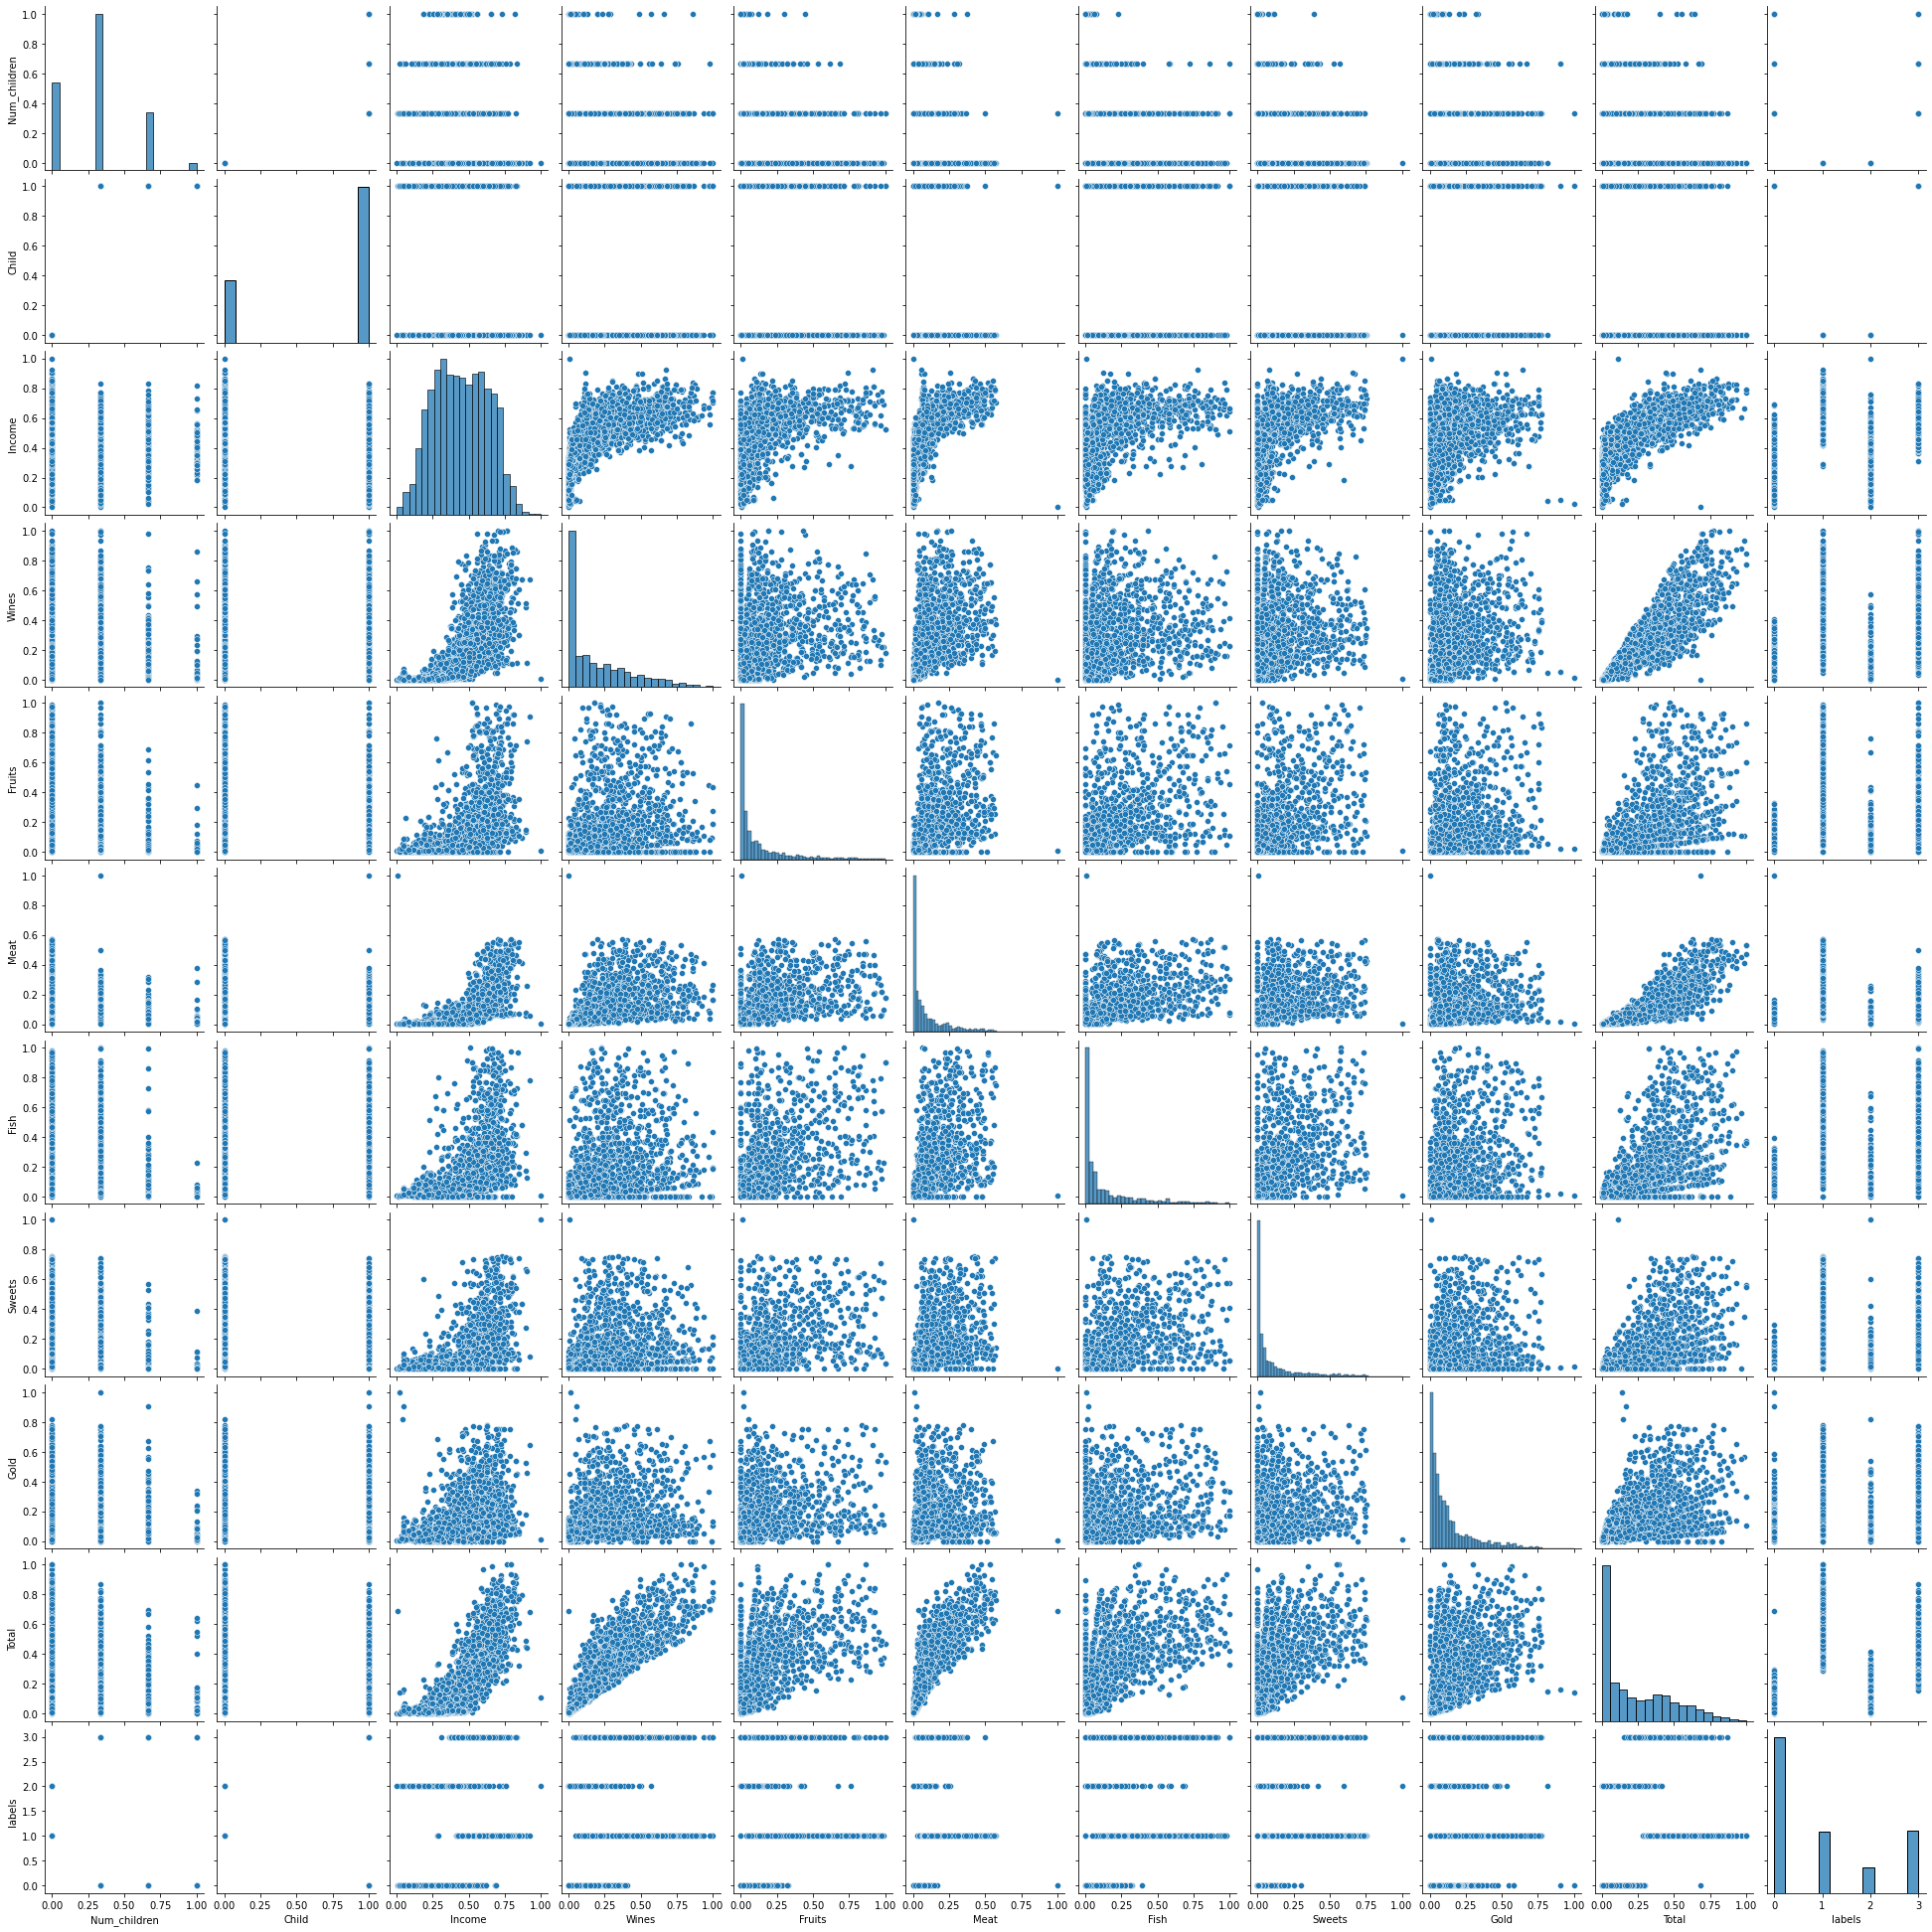

In [24]:
sns.pairplot(X_scaled)
plt.show()

## Save labeled dataset as pickle object and as a csv file

In [25]:
# pickle
X.to_pickle("./saved-items/labeled.pkl")

# csv file
X.to_csv("./saved-items/clustered-dataset.csv", index=False)